In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

In [3]:
# change plt text size
plt.rcParams.update({'font.size': 14})
# text size for the legend
plt.rcParams.update({'legend.fontsize': 12})
# text size for the axis
plt.rcParams.update({'axes.labelsize': 14})
# text size for the axis title
plt.rcParams.update({'axes.titlesize': 14})
# 12 matplotlib colors
colors = ['b', 'g', 'r', 'm', 'y', 'k', 'orange', 'purple', 'brown', 'pink']
# 12 line styles matplotlib
line_styles = ['-', '--']
LINE_THICKNESS = 2

In [16]:
def scrape_o_files(directory):
    names = []
    paths = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.0'):
                file = os.path.join(root, file)
                name = file.split("/")[-2][:-15]
                paths.append(file)
                names.append(name)
    return paths,names
def extract_tb_data(log_dir, scalar_name):
    event_acc = EventAccumulator(log_dir)
    event_acc.Reload()
    scalar_events = event_acc.Scalars(scalar_name)
    w_times = [event.wall_time for event in scalar_events]
    step_nums = [event.step for event in scalar_events]
    vals = [event.value for event in scalar_events]
    relative_times = [(w_time - w_times[0]) / 60 for w_time in w_times]
    relative_time_s = [(w_time - w_times[0]) for w_time in w_times]
    return pd.DataFrame({'wall_time': w_times, 'min': relative_times, 'sec': relative_times, 'Env_steps': step_nums, 'value': vals})

def generate_plot(paths,names,title="plot",x_axis = "Env_steps",scalar_name = "returns/avg_episodic_return",figsize=(10,5),save=None):
    plt.figure(figsize=figsize)
    for i,path in enumerate(paths):
        data = extract_tb_data(path, scalar_name)
        data[x_axis] = data[x_axis][:200]
        data['value'] = data['value'][:200]
        plt.plot(data[x_axis], data['value'], label=names[i], color=colors[i], linestyle=line_styles[i%len(line_styles)], linewidth=LINE_THICKNESS)
    plt.xlabel(x_axis.replace('_', ' ').capitalize())
    plt.ylabel(scalar_name.split("/")[-1].replace('_', ' ').capitalize())
    plt.legend()
    plt.title(title)
    plt.tight_layout()
    if save:
        plt.savefig(f"plots/{save}.png")
    plt.show()
    plt.close()
        
    

In [34]:
DIR_PATH = "/home/guru/Quarter_work/Q3/CS_276/Project1/runs/pick_cube_bench"
paths,names = scrape_o_files(DIR_PATH)

for i in range(len(paths)):
    print(i, names[i])

index = [5,6,11,3,9,1]

names = [names[i] for i in index]
paths = [paths[i] for i in index]
names

0 PickCube-v1__low_512_6e-4
1 PickCube-v1__low_768_4e_4_double
2 PickCube-v1__low_256_2e-4
3 PickCube-v1__low_256_4e_4_double
4 PickCube-v1__low_768_1e-3
5 PickCube-v1__low_256_4e-4
6 PickCube-v1__low_512_4e-4
7 PickCube-v1__low_768_6e-4
8 PickCube-v1__low_1024_6e_4
9 PickCube-v1__low_512_4e_4_double
10 PickCube-v1__low_256_6e-4
11 PickCube-v1__low_768_4e-4
12 PickCube-v1__low_2048_6e_4


['PickCube-v1__low_256_4e-4',
 'PickCube-v1__low_512_4e-4',
 'PickCube-v1__low_768_4e-4',
 'PickCube-v1__low_256_4e_4_double',
 'PickCube-v1__low_512_4e_4_double',
 'PickCube-v1__low_768_4e_4_double']

In [35]:
names = \
['256 Buffersize: 1e6',
 '512 Buffersize: 1e6',
 '768 Buffersize: 1e6',
 '256 Buffersize: 2e6',
 '512 Buffersize: 2e6',
 '768 Buffersize: 2e6']

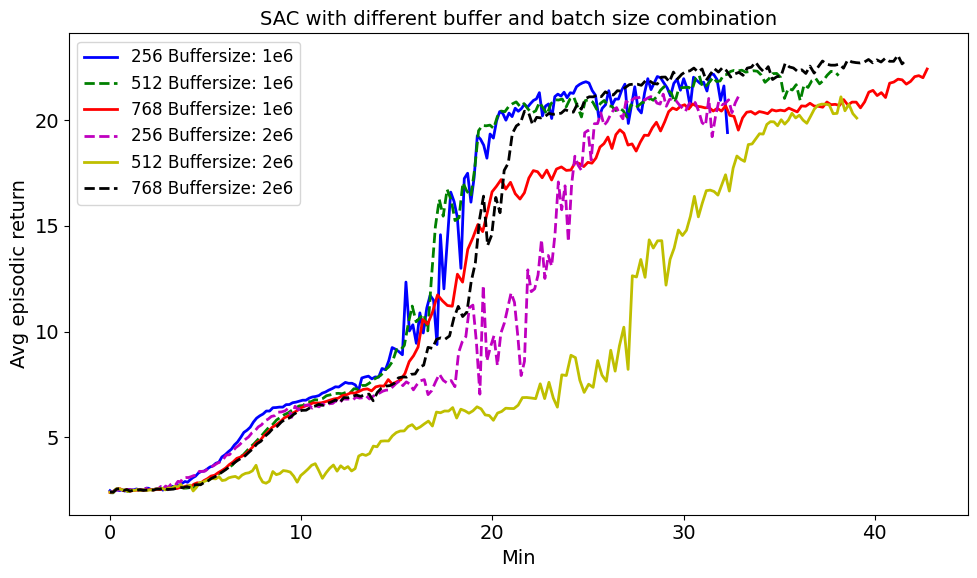

In [36]:
save = "bench_Qlr"

generate_plot(paths,names,x_axis="min",title=r"SAC with different buffer and batch size combination",figsize=(10,6),save=save)